# Wine Classification using Random Forest Classifier

In this notebook, we will perform classification on the Wine dataset using the Random Forest Classifier. We will follow these steps:
1. Load the Wine dataset.
2. Preprocess the data (split into features and target variable).
3. Train a classification model (Random Forest Classifier).
4. Evaluate the model using accuracy, confusion matrix, and classification report.
5. Visualize the results using a confusion matrix heatmap.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

### Load the Wine Dataset
We will load the Wine dataset from a CSV file. This dataset contains various chemical properties of wines, and we aim to predict the class of the wine based on these features.

In [2]:
# Load the Wine dataset (make sure the file path is correct)
wine_data = pd.read_csv('Datasets/WineData.csv')

# Display the first few rows to understand the structure
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## The output is the *quality*

In [3]:
wine_data.quality.unique()# Find the number of classes/ qualities

array([5, 6, 7, 4, 8, 3])

### Data Preprocessing
Now, we will separate the dataset into features (`X`) and the target variable (`y`). The target variable represents the class of the wine, and the features represent the chemical properties of the wine.

In [4]:
#drop the id column. This is an ordering column that does not describe the data
wine_data = wine_data.drop('Id', axis=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Check for null values in the entire DataFrame
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Descrive the data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Let's tell the dataframe which column we want for X  and y.

X = wine_data.loc[:, wine_data.columns != 'quality']
y = wine_data['quality']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
(X_train.shape, X_test.shape)

((914, 11), (229, 11))

### Building and Training the Random Forest Classifier Model
We'll now initialize a **Random Forest Classifier** model and train it on the training data.

In [10]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

### Model Evaluation
We will evaluate the model's performance using three metrics:
- Accuracy
- Confusion Matrix
- Classification Report (Precision, Recall, F1-score)

In [11]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,zero_division=1)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.70

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 27 66  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]

Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       1.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.82      0.43      0.43       229
weighted avg       0.71      0.70      0.69       229



### Visualizing the Confusion Matrix
We will now plot the confusion matrix to visualize the performance of the classification model. This will show how well the model classified the wine types.

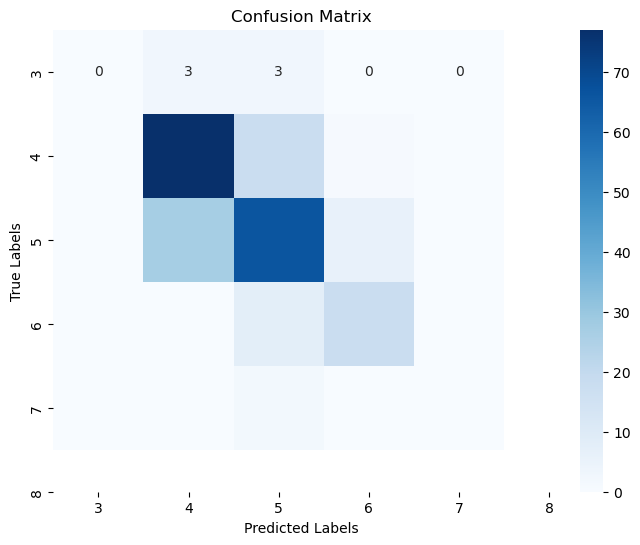

In [12]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()